## Imports

In [1]:
import os
#print(os.getcwd())
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
os.chdir(parent_path)
#os.chdir('energy-analysis-and-predictions')
#print(os.getcwd())

In [115]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from utils.parameters import ENERGY_PRICE_FOLDER, \
                             ENERGY_COMPANIES_FOLDER
from load_data.load_energy_prices import load_energy_prices_data, \
                            load_energy_prices_from_all_files         
from predict_data.create_train_test_data import get_X_y_train_and_test_data, get_train_test_split,\
                                                get_X_y_strides,\
                                                get_scaled_X_y_train_and_test_data
                                                
from process_data.preprocessor import scale_data
from predict_data.load_gru_model import load_gru_model          
from predict_data.registry import compile_model, fit_model,evaluate_model, predict_model                                          
from visualize_data.plot_price_with_interactive_timestamps import plot_price_with_interactive_timestamps   
from visualize_data.plot_model_history import plot_history, plot_history_loss_mse
from visualize_data.plot_predict_vs_test import plot_predict_vs_test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Energy Prices 

## Load data for one file using years: 2018  and 2020 

In [70]:
folder_energy_test_2018 = os.path.join(ENERGY_PRICE_FOLDER, 'Gro_handelspreise_2018_01_01_2018_12_31_Tag.csv')
price_2018 = load_energy_prices_data(folder_energy_test_2018, 'Germany')
price_2018.head()

['Germany/Luxembourg [€/MWh]', '∅ residents Germany/Luxembourg [€/MWh]', 'Germany/Luxembourg/Austria [€/MWh]']
	Germany/Luxembourg [€/MWh]
		 count of not null values = 92
		 type is object


	∅ residents Germany/Luxembourg [€/MWh]
		 count of not null values = 0
	Germany/Luxembourg/Austria [€/MWh]
		 count of not null values = 273
		 type is object




/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Germany [€/MWh]
0,2018-01-01,-25.30
1,2018-01-02,33.44
2,2018-01-03,8.97
3,2018-01-04,29.86
4,2018-01-05,31.51


In [71]:
price_2018.dtypes

Date               datetime64[ns]
Germany [€/MWh]           float64
dtype: object

In [41]:
folder_energy_test_2020 = os.path.join(ENERGY_PRICE_FOLDER, 'Gro_handelspreise_2020_01_01_2020_12_31_Tag.csv')
price_2020 = load_energy_prices_data(folder_energy_test_2020, 'Germany')
price_2020.head()

Germany/Luxembourg [€/MWh]
count of not null values = 366
∅ residents Germany/Luxembourg [€/MWh]
count of not null values = 366
Germany/Luxembourg/Austria [€/MWh]
count of not null values = 0


,Date,Germany [€/MWh]
0,2020-01-01,33.700
1,2020-01-02,38.020
2,2020-01-03,29.595
3,2020-01-04,24.705
4,2020-01-05,34.835


## Energy price loading all files 

In [87]:
country = 'Germany'
folder = ENERGY_PRICE_FOLDER
energy_prices_df = load_energy_prices_from_all_files(folder, country)

Gro_handelspreise_2021_01_01_2021_12_31_Tag.csv
	Germany/Luxembourg [€/MWh]
		 df.shape =(365, 20)
	∅ residents Germany/Luxembourg [€/MWh]
		 df.shape =(365, 20)
	Germany/Luxembourg/Austria [€/MWh]
	average df


Gro_handelspreise_2020_01_01_2020_12_31_Tag.csv
	Germany/Luxembourg [€/MWh]
		 df.shape =(366, 20)
	∅ residents Germany/Luxembourg [€/MWh]
		 df.shape =(366, 20)
	Germany/Luxembourg/Austria [€/MWh]
	average df


Gro_handelspreise_2018_01_01_2018_12_31_Tag.csv
	Germany/Luxembourg [€/MWh]
		 df.shape =(92, 20)
	∅ residents Germany/Luxembourg [€/MWh]
	Germany/Luxembourg/Austria [€/MWh]
		 df.shape =(273, 20)
	concat df


Gro_handelspreise_2019_01_01_2019_12_31_Tag.csv
	Germany/Luxembourg [€/MWh]
		 df.shape =(365, 20)
	∅ residents Germany/Luxembourg [€/MWh]
		 df.shape =(41, 20)
	Germany/Luxembourg/Austria [€/MWh]
	df0 taken


Gro_handelspreise_2022_01_01_2022_12_31_Tag.csv
	Germany/Luxembourg [€/MWh]
		 df.shape =(365, 20)
	∅ residents Germany/Luxembourg [€/MWh]
		 df.shape =(365

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/araceli/code/energy-analysis-and-predictions/load_data/load_energy_prices.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [89]:
plot_price_with_interactive_timestamps(energy_prices_df, energy_prices_df.index, energy_prices_df.columns, 'Energy prices Germany', '[€/MWh]')

## Train and test split

In [91]:
TRAIN_TEST_SEQUENCE = math.ceil(energy_prices_df.shape[0] * 0.05)
print('INPUT_LENGTH_SPLIT =', TRAIN_TEST_SEQUENCE)
TRAIN_TEST_RATIO = 0.7
N_FEATURES = 1
OUTPUT_LENGTH = 1
FOLDS_SEQUENCE = 1
FOLD_LENGTH_RATIO = 0.66
TARGET = energy_prices_df.columns[0]
units_gru_layer_1 = 64
units_gru_layer_2 = int(units_gru_layer_1/2)

INPUT_LENGTH_SPLIT = 92


In [92]:
X_train, y_train, X_test, y_test = get_X_y_train_and_test_data(energy_prices_df,
                                TRAIN_TEST_RATIO,
                                TRAIN_TEST_SEQUENCE,
                                FOLD_LENGTH_RATIO,
                                FOLDS_SEQUENCE,
                                OUTPUT_LENGTH,
                                TARGET) 

length train data 1278
length test data 640
folds length = 422
856 train folds generated
218 test folds generated


In [93]:
len_train = round(energy_prices_df.shape[0]*TRAIN_TEST_RATIO)
len_test = energy_prices_df.shape[0]- len_train + TRAIN_TEST_SEQUENCE

INPUT_LENGTH_FOLD_TEST = round((len_test - OUTPUT_LENGTH)*FOLD_LENGTH_RATIO)
print('INPUT_LENGTH_FOLDS =', INPUT_LENGTH_FOLD_TEST)

total_number_train_folds = len_train - INPUT_LENGTH_FOLD_TEST - OUTPUT_LENGTH + FOLDS_SEQUENCE
total_number_test_folds = len_test - INPUT_LENGTH_FOLD_TEST - OUTPUT_LENGTH + FOLDS_SEQUENCE
print(f'{total_number_train_folds} train folds generated')
print(f'{total_number_test_folds} test folds generated')

INPUT_LENGTH_FOLDS = 422
856 train folds generated
218 test folds generated


In [94]:
assert X_train.shape == (total_number_train_folds, INPUT_LENGTH_FOLD_TEST, N_FEATURES)
assert X_test.shape == (total_number_test_folds, INPUT_LENGTH_FOLD_TEST, N_FEATURES)

## Model and predict

In [95]:
model = load_gru_model(X_train, y_train, units_gru_layer_1, units_gru_layer_2, 'L1L2', 0.05) 

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 422, 64)           12864     
                                                                 
 gru_13 (GRU)                (None, 32)                9408      
                                                                 
 dense_4 (Dense)             (None, 25)                825       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 23,123
Trainable params: 23,123
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_scaled = compile_model(model, learning_rate=0.02, optimizer="rmsprop", metric="mae")

In [98]:
patience = 25
epochs = 100
batch_size = 32
(fited_model, history) = fit_model(model, X_train, y_train, patience, epochs, batch_size)

Epoch 1/100
19/19 [==============================] - 20s 664ms/step - loss: 621.7196 - mae: 20.4326 - val_loss: 472.6241 - val_mae: 17.5015
Epoch 2/100
19/19 [==============================] - 10s 548ms/step - loss: 141.2471 - mae: 9.0582 - val_loss: 710.6229 - val_mae: 22.4771
Epoch 3/100
19/19 [==============================] - 11s 564ms/step - loss: 131.4752 - mae: 8.6308 - val_loss: 527.9312 - val_mae: 18.7102
Epoch 4/100
19/19 [==============================] - 10s 546ms/step - loss: 124.6587 - mae: 8.3255 - val_loss: 1035.9833 - val_mae: 29.5133
Epoch 5/100
19/19 [==============================] - 9s 488ms/step - loss: 121.6500 - mae: 8.0426 - val_loss: 494.2512 - val_mae: 18.0680
Epoch 6/100
19/19 [==============================] - 9s 481ms/step - loss: 94.7624 - mae: 7.0278 - val_loss: 615.8692 - val_mae: 20.6115
Epoch 7/100
19/19 [==============================] - 10s 520ms/step - loss: 117.5652 - mae: 8.0628 - val_loss: 742.3516 - val_mae: 23.9216
Epoch 8/100
19/19 [=========

array([<AxesSubplot:title={'center':'MSE, split_ratio= 0.7, split_seq= 92,    fold_ratio= 0.66, fold_seq= 1, layer_1= 64, layer_2= 32'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

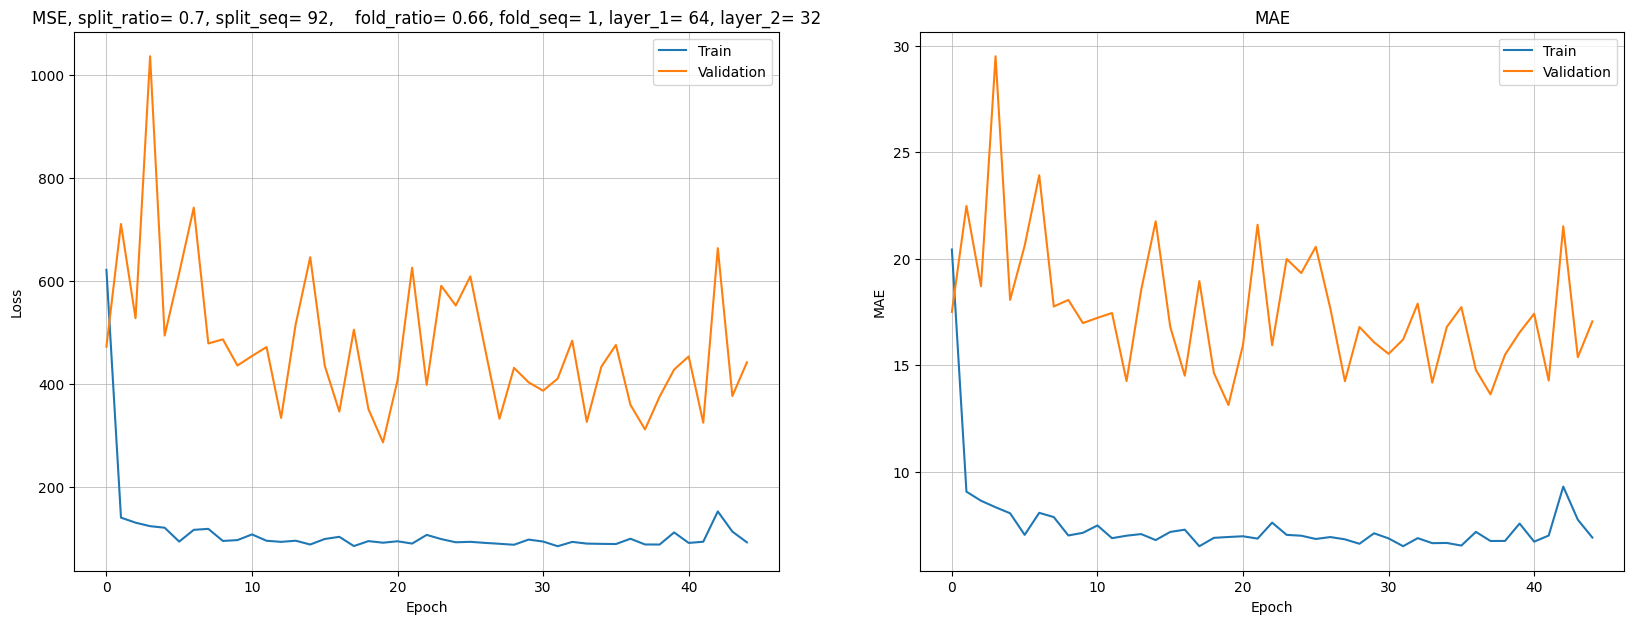

In [99]:
plot_history(history, TRAIN_TEST_RATIO, TRAIN_TEST_SEQUENCE, FOLD_LENGTH_RATIO, FOLDS_SEQUENCE, units_gru_layer_1, units_gru_layer_2)

array([<AxesSubplot:title={'center':'MSE, split_ratio= 0.7, split_seq= 281,    fold_ratio= 0.66, fold_seq= 1, layer_1= 64, layer_2= 32'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

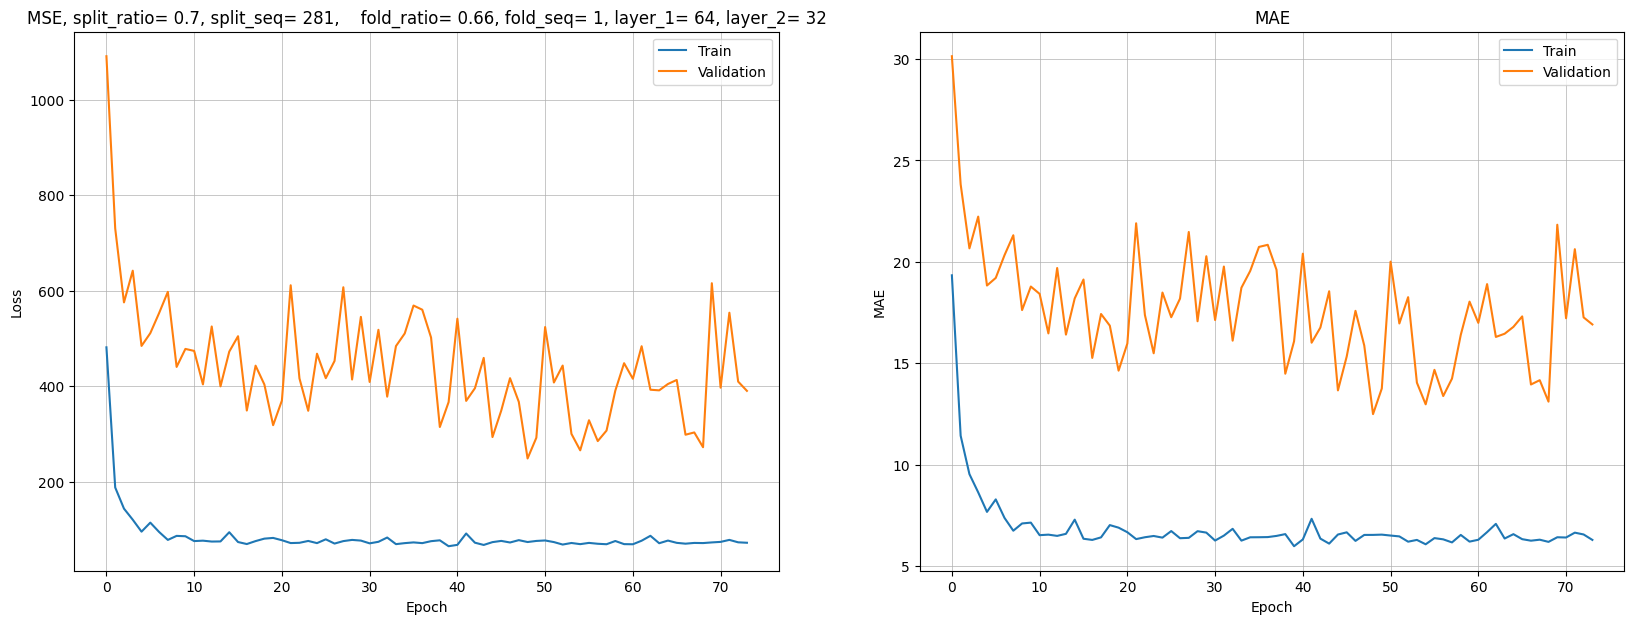

In [19]:
plot_history(history, TRAIN_TEST_RATIO, TRAIN_TEST_SEQUENCE, FOLD_LENGTH_RATIO, FOLDS_SEQUENCE, units_gru_layer_1, units_gru_layer_2)

array([<AxesSubplot:title={'center':'MSE, split_ratio= 0.7, split_seq= 281,    fold_ratio= 0.66, fold_seq= 1, layer_1= 128, layer_2= 64'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

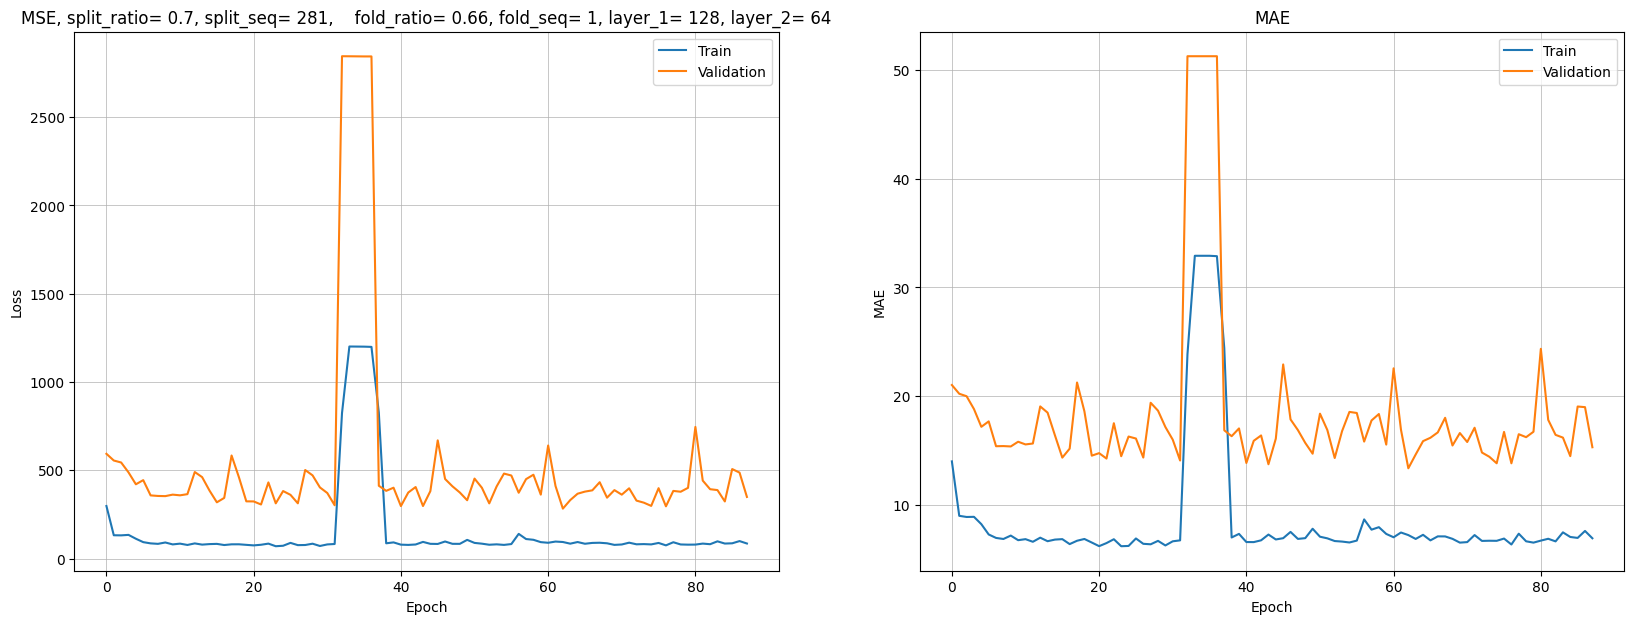

In [17]:
plot_history(history, TRAIN_TEST_RATIO, TRAIN_TEST_SEQUENCE, FOLD_LENGTH_RATIO, FOLDS_SEQUENCE, units_gru_layer_1, units_gru_layer_2)

In [101]:
result_evaluate = evaluate_model(fited_model, X_test, y_test)

7/7 [==============================] - 1s 170ms/step - loss: 67841.3594 - mae: 224.2673


In [105]:
y_pre = predict_model(fited_model, X_test)

7/7 [==============================] - 1s 151ms/step


$$ MAE = \frac{1}{n_{samples}} \times \sum_{i = 1}^{n_{samples}} |y_{true}^{(i)} - y_{pred}^{(i)}|$$

In [106]:
plot_predict_vs_test(energy_prices_df, y_test, y_pre, 'Germany Energy Price', False)

In [27]:
plot_predict_vs_test(energy_prices_df, y_test, y_pre, 'Germany Energy Price')

In [28]:
plot_predict_vs_test(energy_prices_df, y_test, y_pre, 'Germany Energy Price')

# Normalize Data

In [107]:
TRAIN_TEST_SEQUENCE = math.ceil(energy_prices_df.shape[0] * 0.05)
print('INPUT_LENGTH_SPLIT =', TRAIN_TEST_SEQUENCE)
TRAIN_TEST_RATIO = 0.7
N_FEATURES = 1
OUTPUT_LENGTH = 1
FOLDS_SEQUENCE = 1
FOLD_LENGTH_RATIO = 0.66
TARGET = energy_prices_df.columns[0]

INPUT_LENGTH_SPLIT = 92


In [108]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler = get_scaled_X_y_train_and_test_data(energy_prices_df,
                                TRAIN_TEST_RATIO,
                                TRAIN_TEST_SEQUENCE,
                                FOLD_LENGTH_RATIO,
                                FOLDS_SEQUENCE,
                                OUTPUT_LENGTH,
                                TARGET) 

length train data 1278
length test data 640
folds length = 422


# Model with normalize data 

## Parameters

In [132]:
units_gru_layer_1 = 64
units_gru_layer_2 = 32
regularizer = 'L1L2'
penalty = 0.05
activation_function = 'tanh'
opt_compiler = "adam"
model_metric="mse"
patience = 25
epochs = 100
batch_size = 16
foldername = 'raw_data/saved_models'
filename_model = f'model_gru_unit1_{units_gru_layer_1}_unit2_{units_gru_layer_2}_regularizer_{regularizer}_activation{activation_function}_optimizer_{opt_compiler}_metric{model_metric}_epochs_{epochs}_bsize_{batch_size}'
folder_model = foldername + '/' + filename_model
#folder_model= os.path.join(ENERGY_PRICE_FOLDER, full_name)
print(folder_model)

raw_data/saved_models/model_gru_unit1_64_unit2_32_regularizer_L1L2_activationtanh_optimizer_adam_metricmse_epochs_100_bsize_16


# Define model 

In [133]:
model_scaled = load_gru_model(X_train_scaled, y_train_scaled, units_gru_layer_1, units_gru_layer_2, activation_function, regularizer, penalty)
model_scaled = compile_model(model_scaled, learning_rate=0.02, optimizer=opt_compiler, metric=model_metric)
(fited_model_scaled, history_scaled) = fit_model(model_scaled, X_train_scaled, y_train_scaled, patience, epochs, batch_size)
fited_model_scaled.save(folder_model)

Epoch 1/100
38/38 [==============================] - 13s 253ms/step - loss: 0.2798 - mse: 0.0747 - val_loss: 0.3092 - val_mse: 0.0745
Epoch 2/100
38/38 [==============================] - 9s 228ms/step - loss: 0.2630 - mse: 0.0363 - val_loss: 0.1850 - val_mse: 0.0798
Epoch 3/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0623 - mse: 0.0111 - val_loss: 0.0483 - val_mse: 0.0285
Epoch 4/100
38/38 [==============================] - 8s 224ms/step - loss: 0.0248 - mse: 0.0081 - val_loss: 0.0476 - val_mse: 0.0313
Epoch 5/100
38/38 [==============================] - 9s 229ms/step - loss: 0.0240 - mse: 0.0083 - val_loss: 0.0524 - val_mse: 0.0361
Epoch 6/100
38/38 [==============================] - 9s 222ms/step - loss: 0.0240 - mse: 0.0079 - val_loss: 0.0583 - val_mse: 0.0417
Epoch 7/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0253 - mse: 0.0086 - val_loss: 0.0736 - val_mse: 0.0568
Epoch 8/100
38/38 [==============================] - 8s 220ms/step -

INFO:tensorflow:Assets written to: raw_data/saved_models/model_gru_unit1_64_unit2_32_regularizer_L1L2_activationtanh_optimizer_adam_metricmse_epochs_100_bsize_16/assets


INFO:tensorflow:Assets written to: raw_data/saved_models/model_gru_unit1_64_unit2_32_regularizer_L1L2_activationtanh_optimizer_adam_metricmse_epochs_100_bsize_16/assets


## history and prediction

array([<AxesSubplot:title={'center':'loss MSE, split_ratio= 0.7, split_seq= 92,    fold_ratio= 0.66, fold_seq= 1, layer_1= 64, layer_2= 32'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MSE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

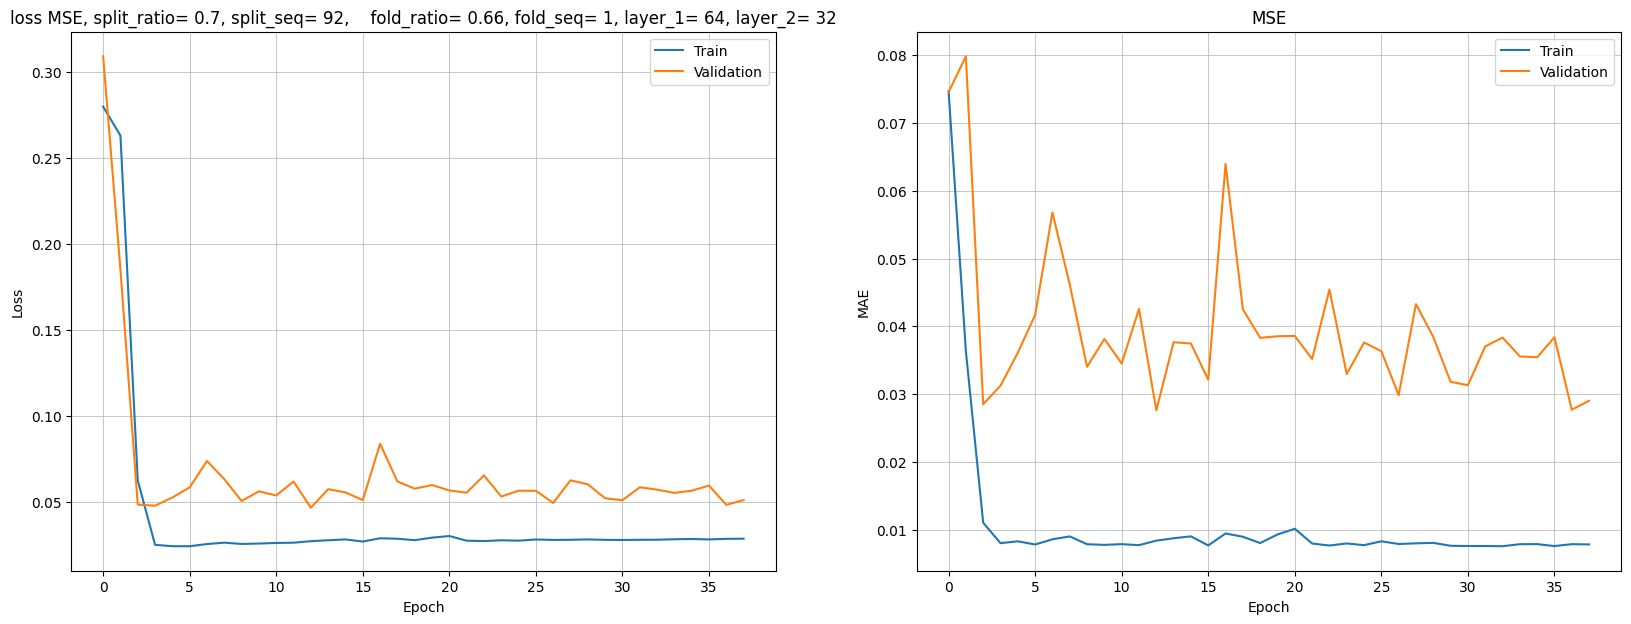

In [134]:
plot_history_loss_mse(history_scaled, TRAIN_TEST_RATIO, TRAIN_TEST_SEQUENCE, FOLD_LENGTH_RATIO, FOLDS_SEQUENCE, units_gru_layer_1, units_gru_layer_2)

In [135]:
y_pred_scaled = predict_model(fited_model_scaled, X_test_scaled)
y_test_unscaled = scaler.inverse_transform(y_test_scaled[:,0])
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled)
plot_predict_vs_test(energy_prices_df,
                         y_test_unscaled,
                         y_pred_unscaled,
                         'Germany energy price using normalization', True)

7/7 [==============================] - 1s 59ms/step


## Other model data loss function

array([<AxesSubplot:title={'center':'loss MSE, split_ratio= 0.7, split_seq= 92,    fold_ratio= 0.66, fold_seq= 1, layer_1= 64, layer_2= 32'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MSE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

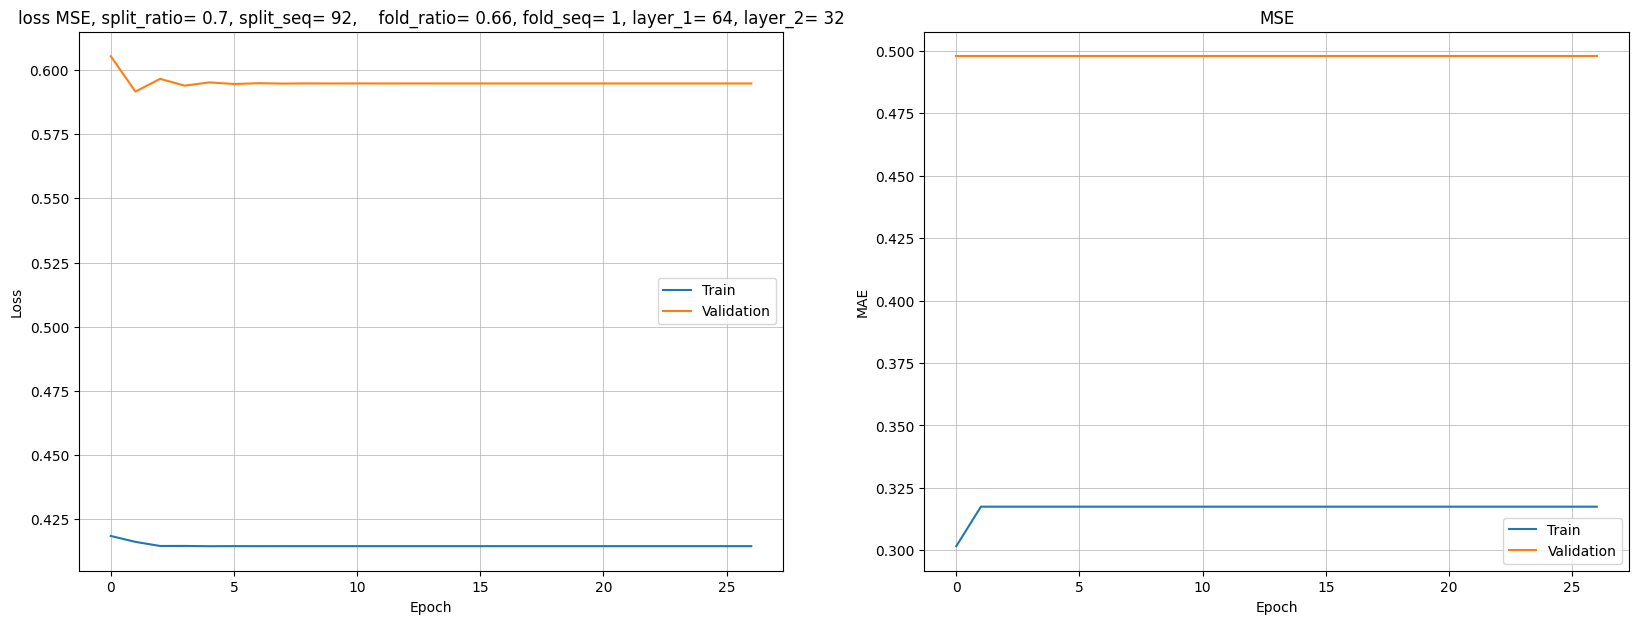

In [116]:
plot_history_loss_mse(history_scaled, TRAIN_TEST_RATIO, TRAIN_TEST_SEQUENCE, FOLD_LENGTH_RATIO, FOLDS_SEQUENCE, units_gru_layer_1, units_gru_layer_2)

In [117]:
evaluate_model(fited_model_scaled, X_test_scaled, y_test_scaled)

7/7 [==============================] - 1s 117ms/step - loss: 6.3605 - mse: 6.2667


[6.360471248626709, 6.2666826248168945]

In [118]:
y_pred_scaled = predict_model(fited_model_scaled, X_test_scaled)

7/7 [==============================] - 2s 119ms/step


In [119]:
y_pred_scaled.shape

(218, 1)

In [120]:
y_test_unscaled = scaler.inverse_transform(y_test_scaled[:,0])
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled)
print('y_test_unscaled.shape', y_test_unscaled.shape)
print('y_pred_unscaled.shape', y_pred_unscaled.shape)

y_test_unscaled.shape (218, 1)
y_pred_unscaled.shape (218, 1)


In [121]:
y_pred_unscaled[0:5,0]

array([-42.239998, -42.239998, -42.239998, -42.239998, -42.239998],
      dtype=float32)

In [122]:
y_pred_scaled[0:5,0]

array([0., 0., 0., 0., 0.], dtype=float32)

In [71]:

plot_predict_vs_test(energy_prices_df,
                         y_test_unscaled,
                         y_pred_unscaled,
                         'Germany energy price using normalization', True)